In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# Read image

In [4]:
file_path = './C1HW04-2022/C1HW04_IMG01_2022.jpg'
im = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 灰階

# Fourier Transform (FT)

In [5]:
def FT(Gray_img):
    f = np.fft.fft2(Gray_img) # fourier transform
    f_shift = np.fft.fftshift(f) # shift origin point
    magnitude_spectrum = 20 * np.log(1 + np.abs(f_shift)) # show specturm photo
    phase_angle = np.angle(f_shift) # show phase angle fig
    return f_shift, magnitude_spectrum, phase_angle # 平移後的fourier transform, 頻譜圖, 相角圖


# Fourier Inverse Transform (FIT)

In [6]:
def FIT(sample_after_FT):
    f_ishift = np.fft.ifftshift(sample_after_FT) # shift again for one shift when has run FT.
    img_back = np.fft.ifft2(f_ishift) # fourier inverse transform
    img_back = np.abs(img_back) # show image of FIT
    return img_back # fourier 逆轉換後的照片

In [ ]:
f_shift, magnitude_spectrum, phase_angle = FT

plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im, cmap='gray')
plt.subplot(2, 2, 2)
plt.title('origin')
plt.imshow(im, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('origin')
plt.imshow(im, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('origin')
plt.imshow(im, cmap='gray')

# ideal pass High and Low

In [7]:
# ideal_pass(gray_img, radius, Low or High)
def ideal_Pass(img_gray, radius, Type): # ideal Lowpass, 設定一個頻率域的threshhold, 去進行保留或去除
    # set parameter
    h, w = img_gray.shape
    center_X = h/2
    center_Y = w/2
    R = radius

    # Fourier Transform
    fft_Shift, magnitude_spectrum, phase_angle = FT(img_gray)

    # Run ideal pass --> classify Low or High
    if (Type == 'Low'):
        for i in range(h):
            for j in range(w):
                if ((i - center_X)**2 + (j - center_Y)**2 > R**2):
                    fft_Shift[i, j] = 0
    else:
        for i in range(h):
            for j in range(w):
                if ((i - center_X)**2 + (j - center_Y)**2 < R**2):
                    fft_Shift[i, j] = 0

    # Fourier inverse transform
    img = FIT(fft_Shift)

    # spectrum
    specturm = 20 * np.log(1 + np.abs(fft_Shift))

    return img, specturm


# Gaussian filter

In [8]:
def gaussian_pass(img_gray, D0, Type):
    # set parameter
    h, w = img_gray.shape
    center_X = h/2
    center_Y = w/2

    # Fourier Transform
    fft_Shift, magnitude_spectrum, phase_angle = FT(img_gray)

    # Run gaussian pass --> classify Low or High
    if (Type == 'Low'):
        val, direct = (0, 1)
    else: 
        val, direct = (1, -1)
    for i in range(h):
        for j in range(w):
            fft_Shift[i, j] = fft_Shift[i, j] * (val + direct * (np.exp(-((i - center_X)**2 + (j - center_Y)**2) / (2 * (D0**2)))))

    # Fourier inverse transform
    img = FIT(fft_Shift)

    # spectrum
    specturm = 20 * np.log(1 + np.abs(fft_Shift))

    return img, specturm
    
gaussian_pass(im, 90, 'Low')
    

(array([[224.92663374, 224.81103403, 224.65544765, ..., 224.98921495,
         224.98936629, 224.97261366],
        [224.9801571 , 224.85194938, 224.65208113, ..., 224.96578539,
         224.99124529, 225.00223115],
        [225.00182185, 224.87755072, 224.65407252, ..., 224.90352547,
         224.97123931, 225.00651854],
        ...,
        [224.6736418 , 224.74758333, 224.81142579, ..., 224.93218573,
         224.83877634, 224.72564353],
        [224.75683221, 224.76519279, 224.74171718, ..., 224.9727378 ,
         224.91516931, 224.82169741],
        [224.85413003, 224.79080905, 224.68973941, ..., 224.99037652,
         224.96583577, 224.91294088]]),
 array([[0.23542317, 0.10113717, 0.07285888, ..., 0.16001272, 0.07285888,
         0.10113717],
        [0.09587013, 0.06413086, 0.05324752, ..., 0.03422158, 0.04885088,
         0.09978407],
        [0.11487282, 0.08216525, 0.0954907 , ..., 0.07914911, 0.03949392,
         0.0856229 ],
        ...,
        [0.17034123, 0.13460238, 0.1

# Butterworth filter

In [9]:
def butterworth_pass(img_gray, D0, n, Type):
    # set parameter
    h, w = img_gray.shape
    center_X = h/2
    center_Y = w/2

    # Fourier Transform
    fft_Shift, magnitude_spectrum, phase_angle = FT(img_gray)

    # Run gaussian pass --> classify Low or High
    if (Type == 'Low'):
        val, direct = (0, 1)
    else: 
        val, direct = (1, -1)
    for i in range(h):
        for j in range(w):
           fft_Shift[i, j] = fft_Shift[i, j] * (val + direct * (1 / (1 + (((i - center_X)**2 + (j - center_Y)**2) / D0)**n)))
    
    # Fourier inverse transform
    img = FIT(fft_Shift)

    # spectrum
    specturm = 20 * np.log(1 + np.abs(fft_Shift))

    return img, specturm

butterworth_pass(im, 60, 5, 'Low')

(array([[228.16617858, 227.85864545, 227.55341207, ..., 229.09513391,
         228.78515401, 228.47526101],
        [228.35999996, 228.05462967, 227.75133945, ..., 229.28096858,
         228.97391843, 228.66668177],
        [228.55179087, 228.24914453, 227.94827971, ..., 229.46259648,
         229.15928548, 228.85543002],
        ...,
        [227.57671589, 227.2659339 , 226.95764566, ..., 228.51700475,
         228.20293995, 227.88928331],
        [227.7741026 , 227.46387728, 227.15615758, ..., 228.71267123,
         228.39920059, 228.0861132 ],
        [227.97073732, 227.66159025, 227.35488448, ..., 228.90554431,
         228.59342955, 228.28159131]]),
 array([[5.50670620e-13, 2.26485497e-13, 1.59872116e-13, ...,
         3.41948692e-13, 1.59872116e-13, 2.26485497e-13],
        [2.17603713e-13, 1.42108547e-13, 1.15463195e-13, ...,
         7.10542736e-14, 1.02140518e-13, 2.17603713e-13],
        [2.53130850e-13, 1.77635684e-13, 1.99840144e-13, ...,
         1.59872116e-13, 7.99360578

# homomorphic

In [10]:
def homomorphic(img_gray, gammaH, gammaL, D0, c):
    img_gray = np.log(img_gray) # get ln() for fig. 4.58
    h, w = img_gray.shape
    center_X = h/2
    center_Y = w/2
    
    # Fourier Transform
    fft_Shift, magnitude_spectrum, phase_angle = FT(img_gray)

    # run homomorphic --> reference: https://www.twblogs.net/a/5bca7d8d2b71777351979e58 
    for i in range(h):
        for j in range(w):
           fft_Shift[i, j] = fft_Shift[i, j] * ((gammaH - gammaL) * (1 - np.exp(-c * ((i - center_X)**2 + (j - center_Y)**2) / D0**2)) + gammaL) # formular: 4-147
    
    # Fourier inverse transform
    img = FIT(fft_Shift)
    img = np.exp(img) #  get exp() for fig. 4.58
    
    # spectrum
    specturm = 20 * np.log(1 + np.abs(fft_Shift))
    cv2.imwrite('h.jpg', (img - np.min(img)) / np.max(img) * 255)
    # plt.imsave('h.jpg', img)

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(specturm, cmap='gray')
    plt.show()
    
    # return img, specturm

# homomorphic(im, 2, 0.2, 60, 1)
    


# create a motion blurred image

In [11]:
def motion_blured(img_gray, addNoise, T, a, b, K):
    # Motion blur parameters
    # addNoise: 1--> yes, 0 --> no
    # T: duration of exposure
    # a: vertical motion
    # b: horizontal motion
    # K: the wiener parameter, small is better

    # FT
    fft_Shift, magnitude_spectrum, phase_angle = FT(img_gray)

    #-----Creat array H(u, v) "start"-----#
    # H(u, v), motion blur function in frequency domain
    # Create matrix H (motion blur function H(u, v))
    M,N = fft_Shift.shape 
    H = np.zeros((M + 1, N + 1), dtype = np.complex128) # +1 to avoid zero division

    # Fill matrix H
    for u in range(1, M + 1):
        for v in range(1, N + 1):
            w = np.pi * (u * a + v * b)
            H[u, v] = (T / w) * np.sin(w) * np.exp(-1j * w) # formular 5-77

    # index slicing
    H = H[1 : , 1 : ]     
    #-----Creat array H(u, v) "end"-----#
    
    # add noise
    if addNoise == 1:
        # G(u, v), blurred image in frequency domain
        G = H * fft_Shift

        # Fourier inverse transform
        img = FIT(G)
        
        # creat noise matrix
        mean = 0
        variance = 20 # 題目設定
        noise = np.random.normal(mean, variance, img.size)
        noise = noise.reshape(img.shape[0], img.shape[1]).astype('uint8')

        img = img * noise
        G, magnitude_spectrum, phase_angle = FT(img)
    else:
        # G(u, v), blurred image in frequency domain
        G = H * fft_Shift

        # Fourier inverse transform
        img = FIT(G)

    # do inverse filter
    # according to formular 5-78
    F_inverse = G / H
    
    img_after_inverse = FIT(F_inverse)

    # do wiener filter
    # according to formular 5-85
    # K = 0.0001
    F_wiener = (1 / H) * (np.abs(H)**2 / (np.abs(H)**2 + K)) * G

    img_after_wiener = FIT(F_wiener)

    # compare with inverse and wiener
    img_compare = img_after_inverse - img_after_wiener

    
    # return img, img_after_inverse, img_after_wiener
   
motion_blured(im, 1, 1, 0.1, 0.1, 0.00005)

# inverse filter

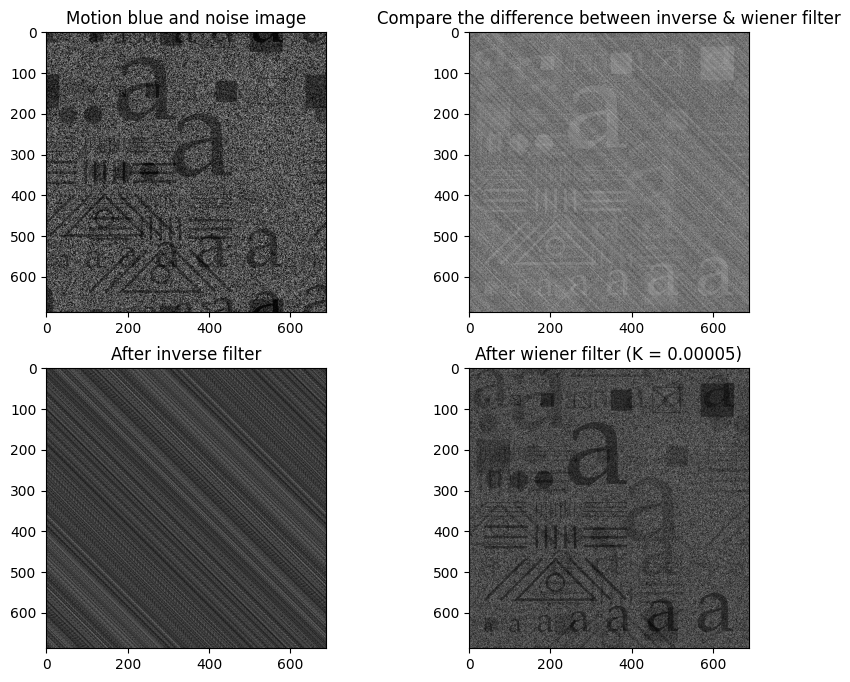

In [12]:
def blurNoiseWiener():
    imgGray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    centerX = imgGray.shape[1]/2
    centerY = imgGray.shape[0]/2
    # Set up variable
    fftShift = np.fft.fftshift(np.fft.fft2(imgGray))
    fftShift_blur = np.copy(fftShift)

    # Do Motion Blur
    a = 0.1
    b = 0.1
    T = 1
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blur[i,j] = fftShift_blur[i,j]
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blur[i,j] = fftShift_blur[i,j] * motionBlur

    # IFFT
    fftShift_blur_ = np.fft.ifftshift(fftShift_blur)
    motionBlur_Img = np.abs(np.fft.ifft2(fftShift_blur_))

    # Add noise
    mean = 0
    variance = 20
    noise = np.random.normal(mean, variance, motionBlur_Img.size)
    noise = noise.reshape(imgGray.shape[0], imgGray.shape[1]).astype('uint8')
    motionBlurNoise_Img = motionBlur_Img*noise

    # Show Image
    plt.figure(figsize = (10,8))
    afterImg = plt.subplot(2,2,1)
    afterImg.imshow(motionBlurNoise_Img, cmap ='gray')
    plt.title('Motion blue and noise image')

    # Do inverse filter
    fftShift_blurNoise_inverse = np.fft.fftshift(np.fft.fft2(motionBlurNoise_Img))
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blurNoise_inverse[i,j] = fftShift_blurNoise_inverse[i,j]
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blurNoise_inverse[i,j] = 1 / motionBlur * fftShift_blurNoise_inverse[i,j]
    
    # Do wiener filter
    K = 0.00005
    fftShift_blurNoise_wiener = np.fft.fftshift(np.fft.fft2(motionBlurNoise_Img))
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blurNoise_wiener[i,j] = fftShift_blurNoise_wiener[i,j]
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blurNoise_wiener[i,j] = 1 / motionBlur * (motionBlur**2/(motionBlur**2 + K)) * fftShift_blurNoise_wiener[i,j]

    # IFFT
    fftShift_blurNoise_inverse = np.fft.ifftshift(fftShift_blurNoise_inverse)
    blurNoiseInverse_Img = np.abs(np.fft.ifft2(fftShift_blurNoise_inverse))
    fftShift_blurNoise_wiener = np.fft.ifftshift(fftShift_blurNoise_wiener)
    blurNoiseWiener_Img = np.abs(np.fft.ifft2(fftShift_blurNoise_wiener))

    # Regulate
    blurNoiseInverse_Img = (blurNoiseInverse_Img - blurNoiseInverse_Img.min())*255/blurNoiseInverse_Img.max()   # naormalize
    blurNoiseWiener_Img = (blurNoiseWiener_Img - blurNoiseWiener_Img.min())*255/blurNoiseWiener_Img.max()       # naormalize
    compare_Img = blurNoiseInverse_Img - blurNoiseWiener_Img

    # # Show Data
    # show_text.insert('insert', "Add motion blur and gaussian noise in image, and use wiener filter to reconstruct")
    # show_text.insert('insert', '\n')

    # Show Image
    ifftImage_compare = plt.subplot(2,2,2) 
    ifftImage_compare.imshow(compare_Img, cmap ='gray')
    plt.title('Compare the difference between inverse & wiener filter')

    ifftImage_inverese = plt.subplot(2,2,3) 
    ifftImage_inverese.imshow(blurNoiseInverse_Img, cmap ='gray')
    plt.title('After inverse filter')

    ifftImage_wiener = plt.subplot(2,2,4) 
    ifftImage_wiener.imshow(blurNoiseWiener_Img, cmap ='gray')
    plt.title('After wiener filter (K = 0.00005)')

    plt.show()
blurNoiseWiener()

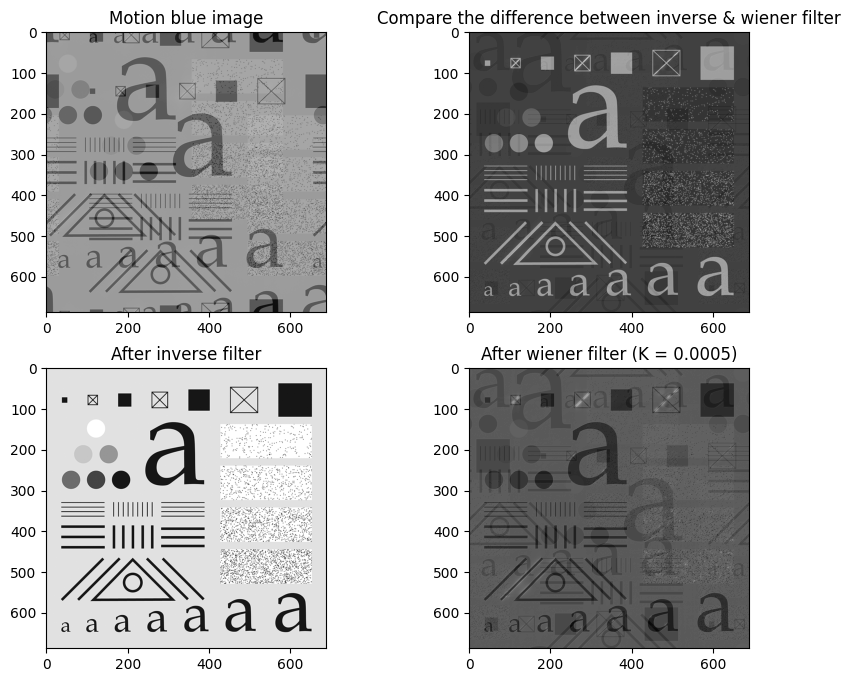

In [13]:
def blurWiener():
    imgGray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    centerX = imgGray.shape[1]/2
    centerY = imgGray.shape[0]/2

    # Set up variableZ
    fftShift = np.fft.fftshift(np.fft.fft2(imgGray))
    fftShift_blur = np.copy(fftShift)

    # Do Motion Blur
    a = 0.1
    b = 0.1
    T = 1
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blur[i,j] = fftShift_blur[i,j] 
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blur[i,j] = fftShift_blur[i,j] * motionBlur
    
    # IFFT
    fftShift_blur_ = np.fft.ifftshift(fftShift_blur)
    motionBlur_Img = np.abs(np.fft.ifft2(fftShift_blur_))

    # Show motion blur image
    plt.figure(figsize = (10,8))
    afterImg= plt.subplot(2,2,1)
    afterImg.imshow(motionBlur_Img, cmap ='gray')
    plt.title('Motion blue image')

    # Do inverse filter
    fftShift_blur_inverse = np.copy(fftShift_blur)
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blur_inverse[i,j] = fftShift_blur_inverse[i,j]
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blur_inverse[i,j] = 1 / motionBlur * fftShift_blur_inverse[i,j]

    # Do wiener filter
    K = 0.0005
    fftShift_blur_wiener = np.copy(fftShift_blur)
    for i in range(0, imgGray.shape[0]):
        for j in range(0, imgGray.shape[1]):
            if i == 0 and j == 0 :
                fftShift_blur_wiener[i,j] = fftShift_blur_wiener[i,j]
            else :
                motionBlur = np.sin(np.pi*(i*a + j*b))*T/(np.pi*(i*a + j*b))*np.cos(-np.pi*(i*a + j*b))
                fftShift_blur_wiener[i,j] = 1 / motionBlur * (motionBlur**2/(motionBlur**2 + K)) * fftShift_blur_wiener[i,j]

    # IFFT
    fftShift_blur_inverse = np.fft.ifftshift(fftShift_blur_inverse)
    blurInverse_Img = np.abs(np.fft.ifft2(fftShift_blur_inverse))
    fftShift_blur_wiener = np.fft.ifftshift(fftShift_blur_wiener)
    blurWiener_Img = np.abs(np.fft.ifft2(fftShift_blur_wiener))

    # Regulate
    blurInverse_Img = (blurInverse_Img - blurInverse_Img.min())*255/blurInverse_Img.max()   # naormalize
    blurWiener_Img = (blurWiener_Img - blurWiener_Img.min())*255/blurWiener_Img.max()       # naormalize
    compare_Img = blurWiener_Img - blurInverse_Img

    # # Show Data
    # show_text.insert('insert', "Add motion blur in image, and use wiener filter to reconstruct")
    # show_text.insert('insert', '\n')

    # Show image 
    ifftImage_compare = plt.subplot(2,2,2) 
    ifftImage_compare.imshow(compare_Img, cmap ='gray')
    plt.title('Compare the difference between inverse & wiener filter')

    ifftImage_inverse = plt.subplot(2,2,3) 
    ifftImage_inverse.imshow(blurInverse_Img, cmap ='gray')
    plt.title('After inverse filter')

    ifftImage_wiener = plt.subplot(2,2,4) 
    ifftImage_wiener.imshow(blurWiener_Img, cmap ='gray')
    plt.title('After wiener filter (K = 0.0005)')
    
    plt.show()
blurWiener()

# show image

In [14]:

plt.imshow(phase_angle , cmap = 'gray')
plt.show()

NameError: name 'phase_angle' is not defined